# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Data preparation

## Load data

In [2]:
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

In [3]:
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [4]:
df2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


## Basic overview

In [5]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex

## Dataset1

## Dataset2

In [6]:
df1.dtypes

start_time                    object
bat_landing_to_food          float64
habit                         object
rat_period_start              object
rat_period_end                object
seconds_after_rat_arrival      int64
risk                           int64
reward                         int64
month                          int64
sunset_time                   object
hours_after_sunset           float64
season                         int64
dtype: object

In [7]:
df2.dtypes

time                   object
month                   int64
hours_after_sunset    float64
bat_landing_number      int64
food_availability     float64
rat_minutes           float64
rat_arrival_number      int64
dtype: object

## Dataset 1 - datetime64

## Dataset 2 -datetime64

In [8]:
# change the time to datetime 
datetime_cols = ['start_time', 'rat_period_start', 'rat_period_end', 'sunset_time']
for col in datetime_cols:
    df1[col] = pd.to_datetime(df1[col], format="%d/%m/%Y %H:%M", errors='coerce')

df1['habit'] = df1['habit'].astype('category')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 907 non-null    datetime64[ns]
 1   bat_landing_to_food        907 non-null    float64       
 2   habit                      866 non-null    category      
 3   rat_period_start           907 non-null    datetime64[ns]
 4   rat_period_end             907 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  907 non-null    int64         
 6   risk                       907 non-null    int64         
 7   reward                     907 non-null    int64         
 8   month                      907 non-null    int64         
 9   sunset_time                907 non-null    datetime64[ns]
 10  hours_after_sunset         907 non-null    float64       
 11  season                     907 non-null    int64         
dtypes: categ

In [9]:
datetime_cols = ['time']

for col in datetime_cols:
    df2[col] = pd.to_datetime(df2[col], dayfirst=True)

# Display the info to verify the changes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                2123 non-null   datetime64[ns]
 1   month               2123 non-null   int64         
 2   hours_after_sunset  2123 non-null   float64       
 3   bat_landing_number  2123 non-null   int64         
 4   food_availability   2123 non-null   float64       
 5   rat_minutes         2123 non-null   float64       
 6   rat_arrival_number  2123 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 116.2 KB


#### Data types conversion
  Convert all columns (`start_time`, `time`, `rat_period_start`, etc.) to `datetime64` for temporal analysis. 
  Typically convert all the object type column

## Feature engineering - add rat_duration_seconds (end - start) and drop rat_period_start and rat_period_end 

In [10]:
# Create the new column using DataFrame variable
df1['rat_duration_seconds'] = (df1['rat_period_end'] - df1['rat_period_start']).dt.total_seconds()


# Drop the columns directly from the existing DataFrame
df1.drop(columns=['rat_period_end', 'rat_period_start'], inplace=True)
# Display the first 5 rows to check the result
print(df1[['rat_duration_seconds']].head())


   rat_duration_seconds
0                 180.0
1                 300.0
2                 300.0
3                 300.0
4                 300.0


In [11]:
df1.dtypes

start_time                   datetime64[ns]
bat_landing_to_food                 float64
habit                              category
seconds_after_rat_arrival             int64
risk                                  int64
reward                                int64
month                                 int64
sunset_time                  datetime64[ns]
hours_after_sunset                  float64
season                                int64
rat_duration_seconds                float64
dtype: object

In [12]:
df2.dtypes

time                  datetime64[ns]
month                          int64
hours_after_sunset           float64
bat_landing_number             int64
food_availability            float64
rat_minutes                  float64
rat_arrival_number             int64
dtype: object

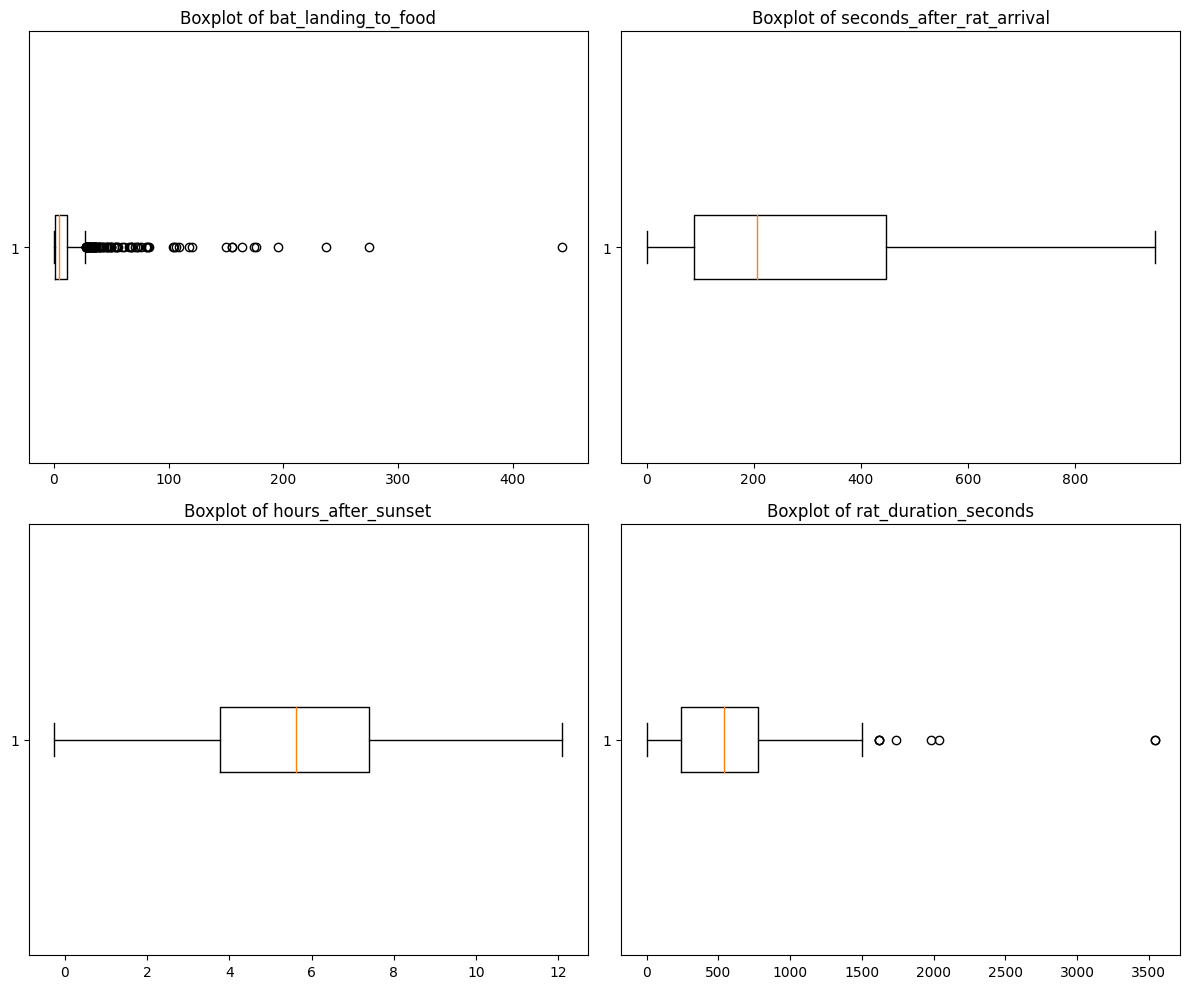

In [13]:
num_cols = ['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset', 'rat_duration_seconds']

plt.figure(figsize=(12, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)  
    plt.boxplot(df1[col], vert=False)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [14]:
# Initialize dictionary for column-specific bounds
bounds = {}
for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    bounds[col] = {'lower': lower_bound, 'upper': upper_bound}

# Cap each column with its own bounds
df1['bat_landing_to_food'] = df1['bat_landing_to_food'].clip(lower=bounds['bat_landing_to_food']['lower'], upper=bounds['bat_landing_to_food']['upper'])
df1['rat_duration_seconds'] = df1['rat_duration_seconds'].clip(lower=bounds['rat_duration_seconds']['lower'], upper=bounds['rat_duration_seconds']['upper'])

bat_landing_to_food: 88 outliers
seconds_after_rat_arrival: 0 outliers
hours_after_sunset: 0 outliers
rat_duration_seconds: 8 outliers


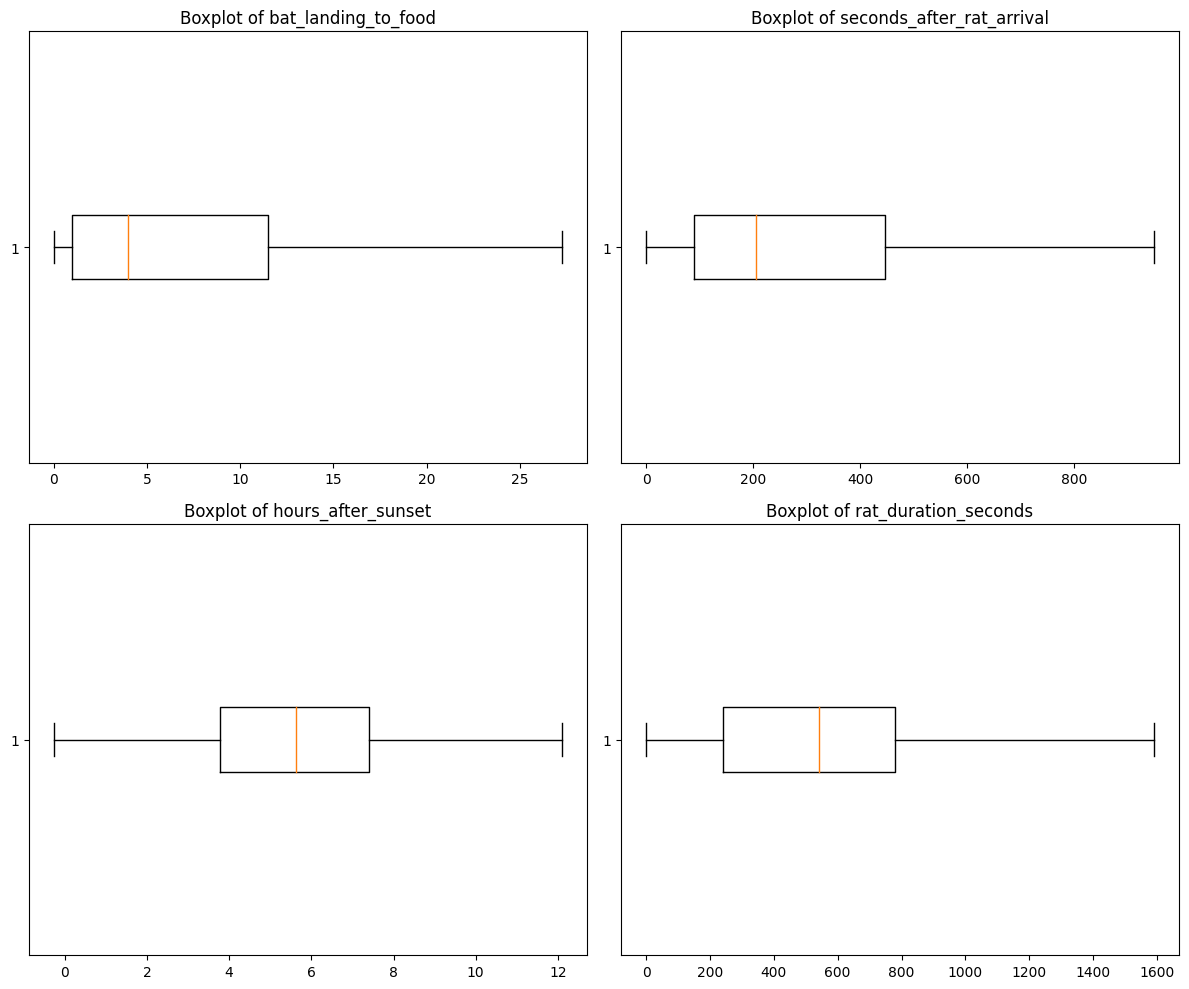

In [15]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)  
    plt.boxplot(df1[col], vert=False)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


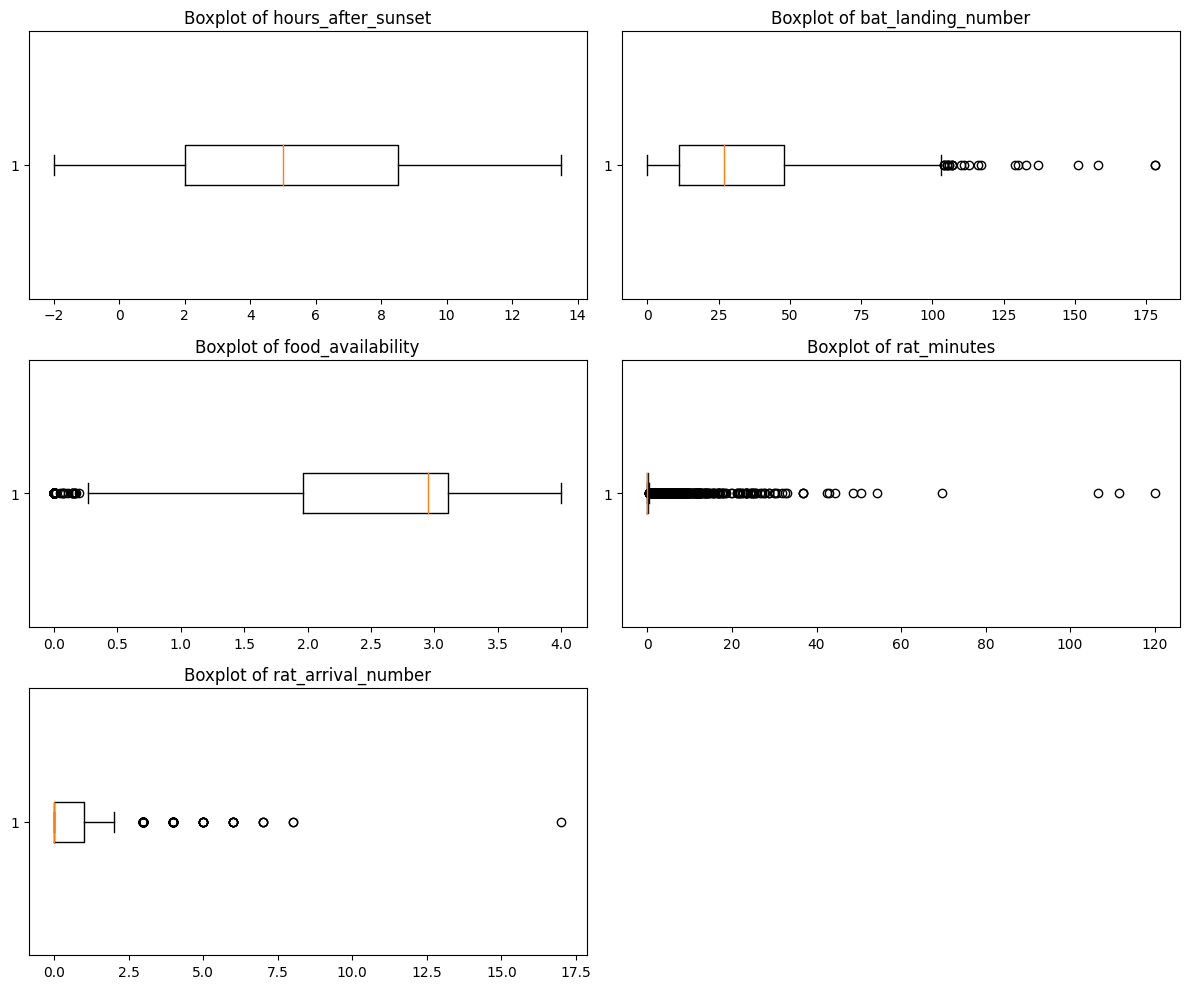

hours_after_sunset: 0 outliers
bat_landing_number: 24 outliers
food_availability: 202 outliers
rat_minutes: 511 outliers
rat_arrival_number: 92 outliers


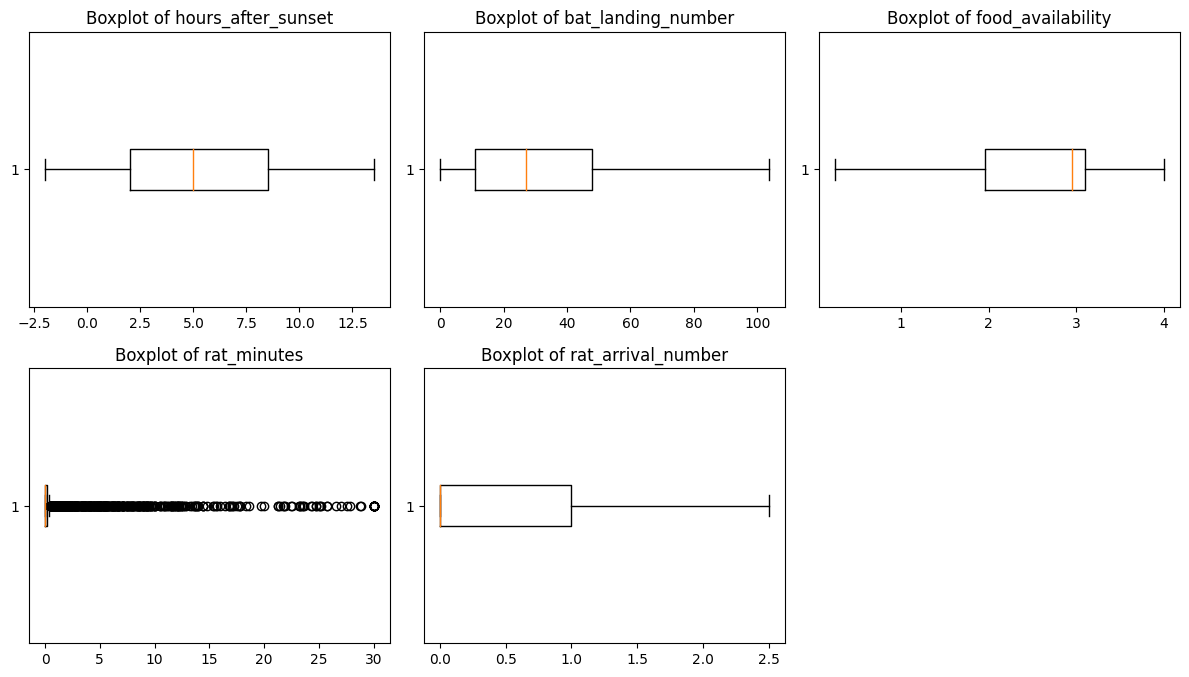

In [16]:
num_cols = ['hours_after_sunset', 'bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number']

plt.figure(figsize=(12, 10))

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)  
    plt.boxplot(df2[col], vert=False)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()
# Initialize dictionary for column-specific bounds
bounds = {}
for col in num_cols:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")
    bounds[col] = {'lower': lower_bound, 'upper': upper_bound}

# # Cap each column with its own bounds
df2['bat_landing_number'] = df2['bat_landing_number'].clip(lower=bounds['bat_landing_number']['lower'], upper=bounds['bat_landing_number']['upper'])
df2['food_availability'] = df2['food_availability'].clip(lower=bounds['food_availability']['lower'], upper=bounds['food_availability']['upper'])
df2['rat_minutes'] = df2['rat_minutes'].clip(lower=bounds['rat_minutes']['lower'], upper= 30)
df2['rat_arrival_number'] = df2['rat_arrival_number'].clip(lower=bounds['rat_arrival_number']['lower'], upper=bounds['rat_arrival_number']['upper'])
plt.figure(figsize=(12, 10))

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)  
    plt.boxplot(df2[col], vert=False)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Data Merging

**Idea**: Match each landing to the nearest 30-minute period

In [17]:
df1_sorted = df1.sort_values('start_time')
df2_sorted = df2.sort_values('time')


# --- 2. Perform the 'asof' merge ---
# This merges each row in df1 with the most recent row from df2
precise_combined_df = pd.merge_asof(
    df1_sorted,
    df2_sorted,
    left_on='start_time',  # Key in the left DataFrame (df1)
    right_on='time',       # Key in the right DataFrame (df2)
    direction='backward'   # Finds the most recent time in df2 for each time in df1
)


# --- 3. Verify the Result ---
print("--- Precisely Merged DataFrame Info ---")
precise_combined_df.info()

print("\n\n--- First 5 Rows of Precisely Merged DataFrame ---")
# 'start_time' is the exact event, 'time' is the start of the 30-min interval it was matched to
print(precise_combined_df[['start_time', 'time', 'habit', 'risk', 'food_availability', 'rat_minutes']].head())

df3 = precise_combined_df
df3.head()


--- Precisely Merged DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 907 non-null    datetime64[ns]
 1   bat_landing_to_food        907 non-null    float64       
 2   habit                      866 non-null    category      
 3   seconds_after_rat_arrival  907 non-null    int64         
 4   risk                       907 non-null    int64         
 5   reward                     907 non-null    int64         
 6   month_x                    907 non-null    int64         
 7   sunset_time                907 non-null    datetime64[ns]
 8   hours_after_sunset_x       907 non-null    float64       
 9   season                     907 non-null    int64         
 10  rat_duration_seconds       907 non-null    float64       
 11  time                       907 

,start_time,bat_landing_to_food,habit,seconds_after_rat_arrival,risk,reward,month_x,sunset_time,hours_after_sunset_x,season,rat_duration_seconds,time,month_y,hours_after_sunset_y,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,2017-12-26 20:57:00,1.0,NaN,239,0,0,0,2017-12-26 16:43:00,4.248611,0,300.0,2017-12-26 20:43:00,0,4.0,51.0,2.968874,1.283333,2.0
1,2017-12-26 20:57:00,5.0,NaN,199,0,0,0,2017-12-26 16:43:00,4.237500,0,300.0,2017-12-26 20:43:00,0,4.0,51.0,2.968874,1.283333,2.0
2,2017-12-26 21:24:00,3.0,fast,121,0,1,0,2017-12-26 16:43:00,4.693611,0,300.0,2017-12-26 21:13:00,0,4.5,53.0,2.561404,4.866667,1.0
3,2017-12-26 21:24:00,15.0,rat,88,1,0,0,2017-12-26 16:43:00,4.684444,0,300.0,2017-12-26 21:13:00,0,4.5,53.0,2.561404,4.866667,1.0
4,2017-12-26 21:24:00,6.0,pick,113,0,1,0,2017-12-26 16:43:00,4.691389,0,300.0,2017-12-26 21:13:00,0,4.5,53.0,2.561404,4.866667,1.0


In [18]:
# Verify month alignment after standardization
print("\nMismatch in Months After Standardization:")
print(df3[df3['month_x'] != df3['month_y']].shape[0])

# Display mismatched rows for debugging
mismatches = df3[df3['month_x'] != df3['month_y']][
    ['start_time', 'time', 'month_x', 'month_y']
]
print("\nMismatched Rows Sample:")
print(mismatches)


Mismatch in Months After Standardization:
8

Mismatched Rows Sample:
             start_time                time  month_x  month_y
675 2018-05-01 00:06:00 2018-04-30 23:50:00        5        4
676 2018-05-01 00:06:00 2018-04-30 23:50:00        5        4
677 2018-05-01 00:06:00 2018-04-30 23:50:00        5        4
678 2018-05-01 00:07:00 2018-04-30 23:50:00        5        4
679 2018-05-01 00:07:00 2018-04-30 23:50:00        5        4
680 2018-05-01 00:08:00 2018-04-30 23:50:00        5        4
681 2018-05-01 00:09:00 2018-04-30 23:50:00        5        4
682 2018-05-01 00:09:00 2018-04-30 23:50:00        5        4


-> There are 8 mismatches due to midight boundary (bat landings on 2018-05-01 00:06:00 still macthed to periods starting 2018-04-30 23:50:00 but it will appear in different months)

--> Will ignore this as the data is still correct (landings are within the 30-minute period), and the impact on Analysis is minimal

## Habit column cleaning process

Fixing typo -> define category -> mapping category (according to the questions)

In [19]:
df3['habit'].unique()

[NaN, 'fast', 'rat', 'pick', 'bat_fight', ..., 'bat_fight_rat', 'bat_rat', '380.6,321.1,550.6,477.5; 263.0,267.0,421.0,43..., 'rat_bat', 'rat_bat_fight']
Length: 82
Categories (81, object): ['157.0,2.6,349.0,159.3; 572.1,275.7,638.3,360.0', '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3', '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,15..., '243.6,235.6,432.2,329.8; 559.0,244.0,622.0,39..., ..., 'rat_disappear', 'rat_pick', 'rat_pick_and_bat', 'rat_to_bat']

description: The context surrounding the landing event and the animals’ behaviour

habit: Contains 81 behavior types with many rare or inconsistent labels + appear to be coordinates or spatial data that accidentally got included in the habit column --> remove those entries. Most invalid entries are numbers, so I use regex function (first remove whitespace, lowercase for consistency then reject if it has numbers, commas, periods, semicolons, etc then apply it to 'unknown' if it is false)

In [20]:
import re
def is_valid_habit(val):
    if pd.isna(val):
        return False
    # remove whitespace, lowercase
    val = val.strip().lower()
    # reject if it matches pattern of only numbers, commas, periods, semicolons
    if re.fullmatch(r'[\d\.,;\s]+', val):
        return False
    return True

df3['habit'] = df3['habit'].astype(str)
df3['habit'] = df3['habit'].apply(lambda x: x if is_valid_habit(x) else 'unknown')

# convert to category
df3['habit'] = df3['habit'].astype('category')


df3['habit'].dtypes

CategoricalDtype(categories=['all_pick', 'attack_rat', 'bat', 'bat_and_pick',
                  'bat_and_pick_far', 'bat_and_rat', 'bat_fight',
                  'bat_fight_and_pick', 'bat_fight_and_rat', 'bat_fight_rat',
                  'bat_figiht', 'bat_pick', 'bat_pick_rat', 'bat_rat',
                  'bat_rat_pick', 'bats', 'both', 'bowl_out', 'eating',
                  'eating_and_bat_and_pick', 'eating_bat_pick',
                  'eating_bat_rat_pick', 'fast', 'fast_and_pick', 'fast_far',
                  'fight', 'fight_bat', 'fight_rat', 'gaze', 'nan', 'no_food',
                  'not_sure_rat', 'other', 'other directions', 'other_bat',
                  'other_bats', 'other_bats/rat', 'others', 'pick',
                  'pick_and_all', 'pick_and_bat', 'pick_and_others',
                  'pick_and_rat', 'pick_bat', 'pick_bat_rat',
                  'pick_eating_all', 'pick_rat', 'pick_rat_and_bat',
                  'pick_rat_bat', 'pup_and_mon', 'rat', 'rat attack',


In [21]:
# see which values is important 
counts = df3['habit'].value_counts()
filtered_counts = counts[counts == 1]
filtered_counts

habit
eating_bat_pick            1
rat_and_no_food            1
pick_rat_bat               1
pup_and_mon                1
bat_fight_rat              1
rat attack                 1
bat_fight_and_rat          1
rat_and_bat_and_pick       1
bat_fight_and_pick         1
rat_and_others             1
rat_and_rat                1
rat_attack                 1
rat_bat                    1
rat_bat_fight              1
rat_disappear              1
bat_and_pick_far           1
rat_pick_and_bat           1
rat_to_bat                 1
pick_rat_and_bat           1
bat_figiht                 1
pick_eating_all            1
other                      1
eating_and_bat_and_pick    1
fast_and_pick              1
fast_far                   1
fight_bat                  1
gaze                       1
eating                     1
not_sure_rat               1
attack_rat                 1
pick_bat_rat               1
other_bat                  1
bowl_out                   1
other_bats/rat             1
bat_rat_

Let's look at the data

The context surrounding the landing event and the animals’ behaviour (what the PDF said)
In the investigation A questions it said: "Do bats perceive rats not just as competitors for food but also as potential predators? If rats are considered a predation risk by bats, scientists believe that this perception will translate into the bats’ higher level of avoidance behaviour or increased vigilance during foraging on the food platform" --> we stick to this to create our behaviour categories. ("Avoidance" + "Vigilance" vs "Normal Forgaging")
I first proposed to put any value that has count < 1 to be "other" as it could act as an outlier, etc. But when I look at the data, there are still many values that should be considered.
Proposed way to fix

Correct typos (bat_figiht --> bat_fight).

Map all the entries into clean categories (manually, I also think about using NLP - hierarchical clustering to divide them, but it's just cleaning data :v )

Here's how I divided the data

Categories
Vigilance / Avoidance

High speed (fast), gaze/orientation changes — suggest caution or predator avoidance (bats considered rats as threats).
Labels such as: fast, fast_and_pick, fast_far, gaze
Foraging/ competitors

Any "pick" actions or bat–rat co-occurrence at food sites.
Labels: pick, bat_and_pick, rat_and_pick, pick_and_others, pick_and_bat, pick_and_rat, etc
Aggressive interactions

Fighting or attack — may indicate defence (predation risk) or food competition
Labels: bat_fight, fight, fight_rat, bat_fight_and_pick.
presence only

presence of bats/rats without actions — baseline for encounter rate.
bat, bats, other_bat, other_bats, rat, not_sure_rat, bat_and_rat
non-foraging/non-aggressive

No food or unclear activity — may link to seasonal scarcity.
no_food, rat_and_no_food, rat_disappear
Unknown

Vague, rare, or irrelevant labels.
nan, unknown, other, others, both, all_pick, bowl_out, pup_and_mon, other directions, rat_and_rat, rat_to_bat

In [22]:
# let's categorize it first
# replace the typo 
df3['habit'] = df3['habit'].replace('bat_figiht', 'bat_fight')


# Define categories
categories = {
    'Vigilance/Avoidance Behaviors': [],
    'Foraging/Competition Behaviors': [],
    'Aggressive Interactions': [],
    'Presence Only': [],
    'Non-Foraging/Non-Aggressive': [],
    'Unknown': []
}



labels, counts = np.unique(df3['habit'].values, return_counts=True)
value_counts = dict(zip(labels, counts))

# Categorize labels
for label in labels:
    count = value_counts.get(label, 1)
    if any(x in label for x in ['fast', 'gaze']):
        categories['Vigilance/Avoidance Behaviors'].append((label, count))
    elif 'pick' in label or 'eating' in label:
        categories['Foraging/Competition Behaviors'].append((label, count))
    elif any(x in label for x in ['fight', 'attack']):
        categories['Aggressive Interactions'].append((label, count))
    elif any(x in label for x in ['bat', 'bats', 'rat']) and 'pick' not in label and 'fight' not in label and 'attack' not in label and 'eating' not in label:
        categories['Presence Only'].append((label, count))
    elif any(x in label for x in ['no_food', 'disappear']):
        categories['Non-Foraging/Non-Aggressive'].append((label, count))
    else:
        categories['Unknown'].append((label, count))


#write some summary
category_summary = {}
for category, items in categories.items():
    total_count = sum(count for _, count in items)
    category_summary[category] = {'labels': items, 'total_count': total_count}

# output results
for category, data in category_summary.items():
    print(f"\n{category}(Total Count:{data['total_count']}):")
    for label, count in data['labels']:
        print(f"  - {label}:{count}")


Vigilance/Avoidance Behaviors(Total Count:248):
  - fast:245
  - fast_and_pick:1
  - fast_far:1
  - gaze:1

Foraging/Competition Behaviors(Total Count:238):
  - all_pick:5
  - bat_and_pick:20
  - bat_and_pick_far:1
  - bat_fight_and_pick:1
  - bat_pick:3
  - bat_pick_rat:1
  - bat_rat_pick:1
  - eating:1
  - eating_and_bat_and_pick:1
  - eating_bat_pick:1
  - eating_bat_rat_pick:1
  - pick:139
  - pick_and_all:3
  - pick_and_bat:8
  - pick_and_others:8
  - pick_and_rat:6
  - pick_bat:6
  - pick_bat_rat:1
  - pick_eating_all:1
  - pick_rat:4
  - pick_rat_and_bat:1
  - pick_rat_bat:1
  - rat_and_bat_and_pick:1
  - rat_and_pick:8
  - rat_pick:14
  - rat_pick_and_bat:1

Aggressive Interactions(Total Count:38):
  - attack_rat:1
  - bat_fight:27
  - bat_fight_and_rat:1
  - bat_fight_rat:1
  - fight:2
  - fight_bat:1
  - fight_rat:2
  - rat attack:1
  - rat_attack:1
  - rat_bat_fight:1

Presence Only(Total Count:308):
  - bat:30
  - bat_and_rat:19
  - bat_rat:1
  - bats:7
  - not_sure_rat:1


In [23]:
# map the data
def map_to_category(label):
    label = str(label).lower()
    if any(x in label for x in ['fast', 'gaze']):
        return 'Vigilance/Avoidance Behaviors'
    elif 'pick' in label or 'eating' in label:
        return 'Foraging/Competition Behaviors'
    elif any(x in label for x in ['fight', 'attack']):
        return 'Aggressive Interactions'
    elif any(x in label for x in ['bat', 'bats', 'rat']) and all(x not in label for x in ['pick', 'fight', 'attack', 'eating']):
        return 'Presence Only'
    elif any(x in label for x in ['no_food', 'disappear']):
        return 'Non-Foraging/Non-Aggressive'
    else:
        return 'Unknown'

# Apply the mapping to create a new column
df3['habit_category'] = df3['habit'].apply(map_to_category)

df3['habit_category'].value_counts()

habit_category
Presence Only                     308
Vigilance/Avoidance Behaviors     248
Foraging/Competition Behaviors    238
Unknown                            71
Aggressive Interactions            38
Non-Foraging/Non-Aggressive         4
Name: count, dtype: int64

## Data types check again

In [24]:
df3['risk'] = df1['risk'].astype('category')
df3['reward'] = df1['reward'].astype('category')
df3['season'] = df1['season'].astype('category')
df3['month'] = df1['month'].astype('category')

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 907 non-null    datetime64[ns]
 1   bat_landing_to_food        907 non-null    float64       
 2   habit                      907 non-null    category      
 3   seconds_after_rat_arrival  907 non-null    int64         
 4   risk                       907 non-null    category      
 5   reward                     907 non-null    category      
 6   month_x                    907 non-null    int64         
 7   sunset_time                907 non-null    datetime64[ns]
 8   hours_after_sunset_x       907 non-null    float64       
 9   season                     907 non-null    category      
 10  rat_duration_seconds       907 non-null    float64       
 11  time                       907 non-null    datetime64[ns]
 12  month_y 

Index(['start_time', 'bat_landing_to_food', 'habit',
       'seconds_after_rat_arrival', 'risk', 'reward', 'month_x', 'sunset_time',
       'hours_after_sunset_x', 'season', 'rat_duration_seconds', 'time',
       'month_y', 'hours_after_sunset_y', 'bat_landing_number',
       'food_availability', 'rat_minutes', 'rat_arrival_number',
       'habit_category', 'month'],
      dtype='object')


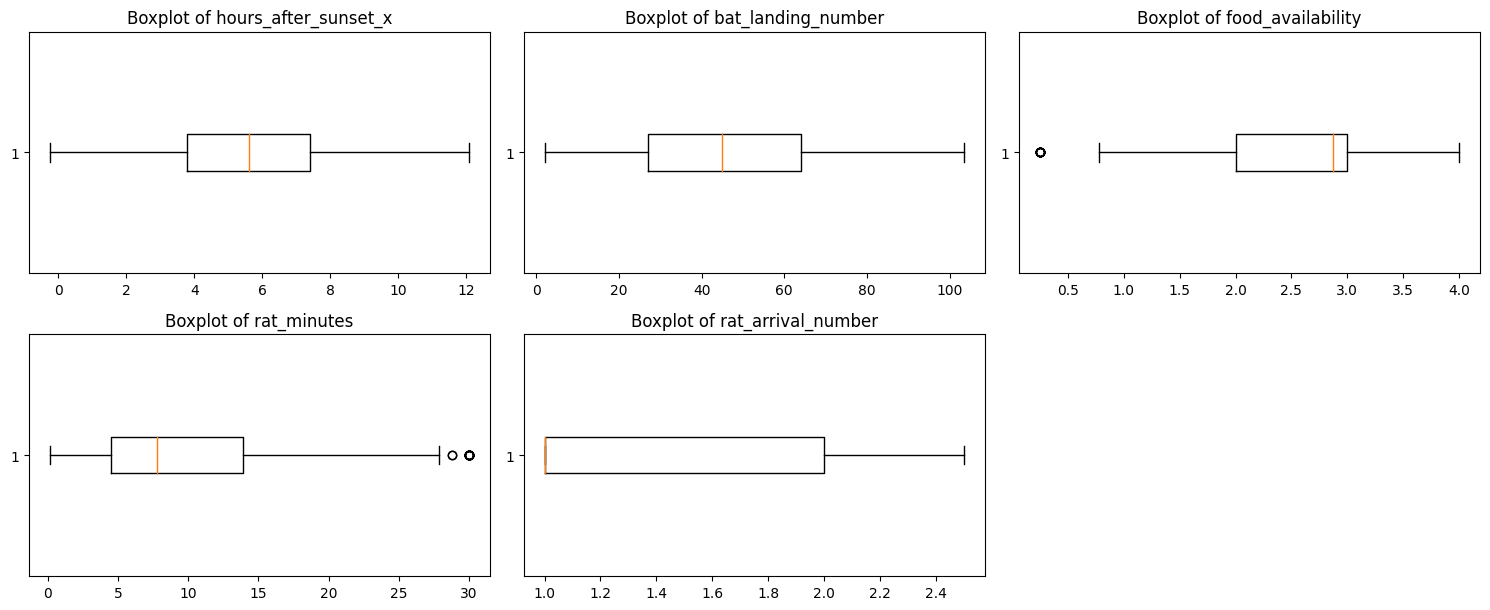

In [25]:
# The error indicates that 'hours_after_sunset' is not a column in df3.
# Let's print the columns of df3 to verify the available columns.
print(df3.columns)

# Adjust the num_cols list to match the actual columns in df3.
# Assuming 'hours_after_sunset_x' or 'hours_after_sunset_y' might be the intended columns.
num_cols = ['hours_after_sunset_x', 'bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number']

plt.figure(figsize=(15, 9))

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1) 
    plt.boxplot(df3[col], vert=False)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Look at the "rat_minutes chart", Some outliers are above 30 minutes, which is impossible for a 30-minute observation period. These are almost certainly data entry or measurement errors.

In the bat_landing_to_food chart, A landing time of 80 seconds is very long, but it's physically possible.

The Outliers look good after removing some extreme numbers, but we can come back to adjust them later.

## Export df3

In [26]:
# Export the DataFrame df3 to a CSV file named 'df3.csv'
df3.to_csv('df3.csv', index=False)

print("DataFrame successfully exported to df3.csv")

DataFrame successfully exported to df3.csv


# Exploratory Data Analysis - understanding and summarising the data 

In this part, we will start uncovering the stories hidden in the data. Now that we have a clean, merged dataset (df3), we can explore it from different angles.

Based on a standard data analysis workflow, a great way to continue is with univariate and bivariate analysis.

## Descriptive Analysis 

## Univariate Analysis (Understanding Single Variables)

Before looking at relationships between variables, it's important to understand the distribution of each one individually.

### Using Bar Charts for Categorical Columns

### Using Histograms for Numerical Columns

/tmp/ipykernel_539/964485215.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha="right")


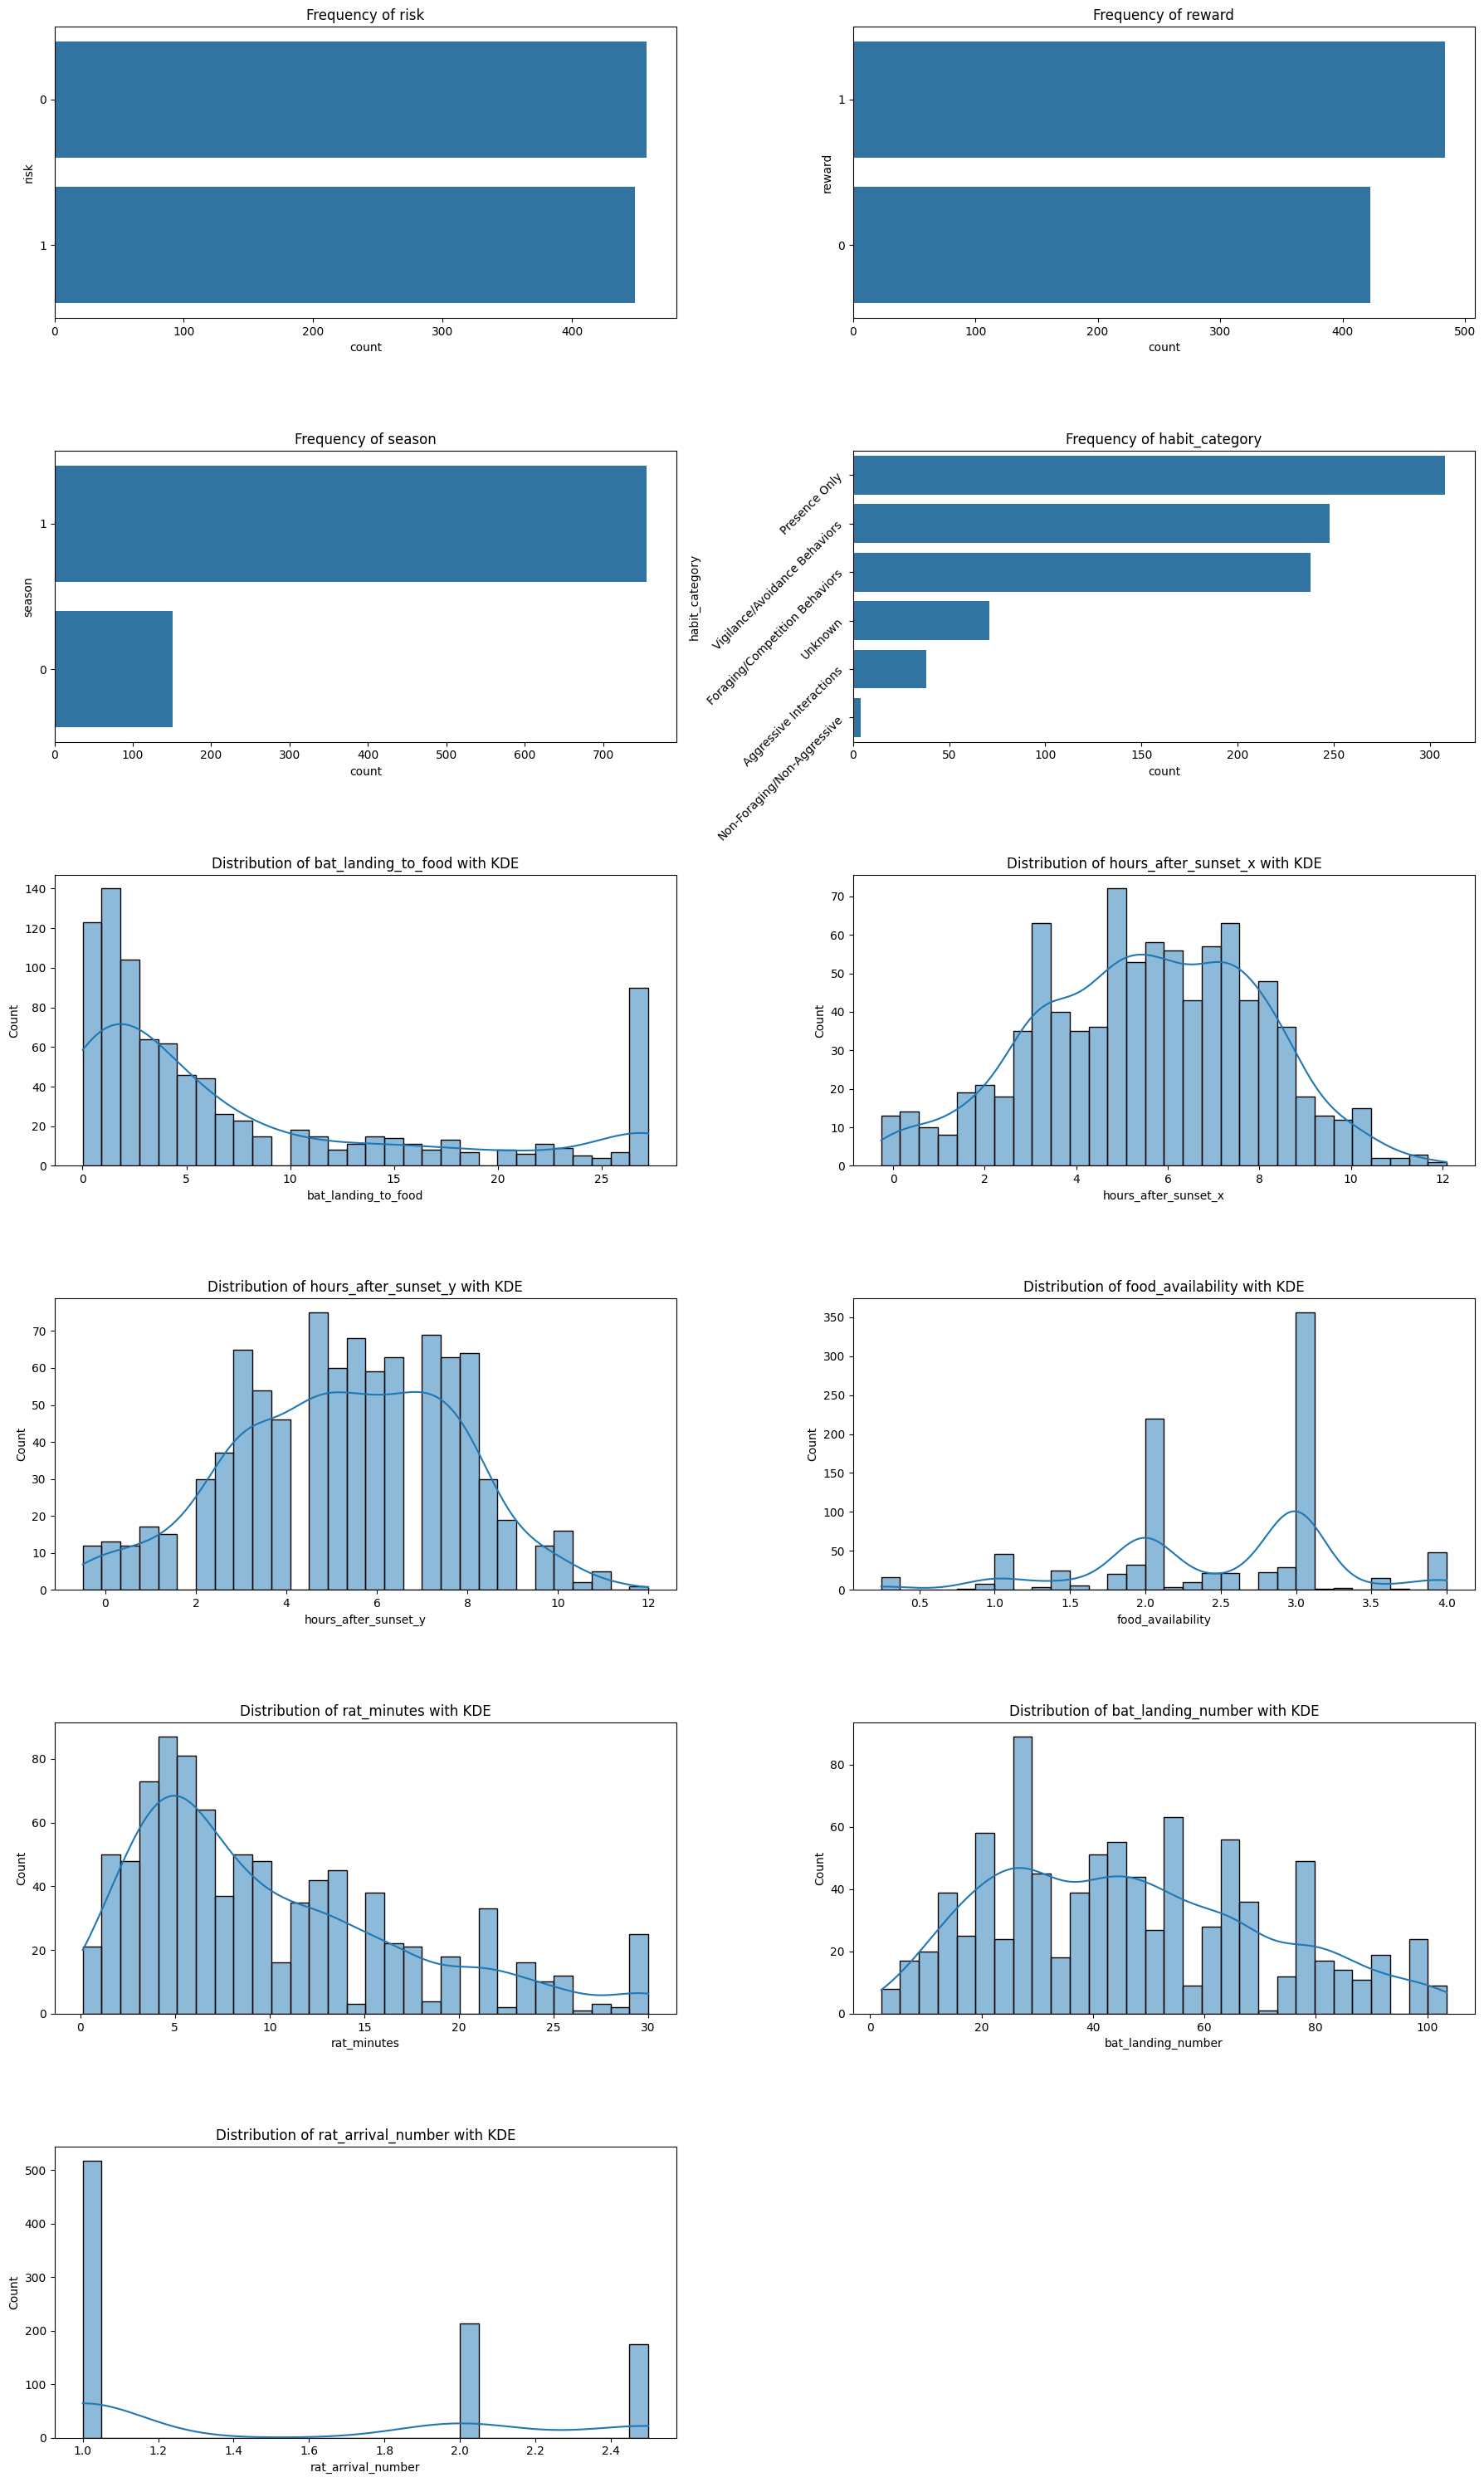

In [27]:
columns_to_analyze = [
    'risk', 
    'reward', 
    'season', 
    'habit_category',
    'bat_landing_to_food', 
    'hours_after_sunset_x', 
    'hours_after_sunset_y', 
    'food_availability',
    'rat_minutes',
    'bat_landing_number',
    'rat_arrival_number'
]

# Create subplots: 3 columns per row
n_cols = 2
n_rows = math.ceil(len(columns_to_analyze) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

for i, col in enumerate(columns_to_analyze):
    ax = axes[i]
    
    if pd.api.types.is_numeric_dtype(df3[col]):
        # Numeric -> histogram with KDE
        sns.histplot(data=df3, x=col, bins=30, kde=True, ax=ax)
        ax.set_title(f'Distribution of {col} with KDE', fontsize=12)
    else:
        # Categorical -> horizontal countplot
        sns.countplot(data=df3, y=col, order=df3[col].value_counts().index, ax=ax)
        ax.set_title(f'Frequency of {col}', fontsize=12)

        # Rotate labels only for habit_category
        if col == "habit_category":
            ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha="right")

# Remove unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Seasons: More data was collected in the spring. This aligns with our later findings that there was more overall bat activity during the spring season.

Habit cateogry: Presence Only > Vigilance/Avoidance Behaviours > Foraging / Competitions > Aggressive Interactions > Non-foraging

bat_landing_to_food : The data is heavily skewed to the right. The vast majority of landings are very fast (the tall bars on the left, close to zero), with a long tail of infrequent but much slower landings.

Bats are typically very efficient. However, the long tail shows that sometimes their landings can be very slow. This skewness is a key clue that something is occasionally causing them to be hesitant—a clue that we later confirmed was the presence of rats.

/tmp/ipykernel_539/1479381013.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha="right")


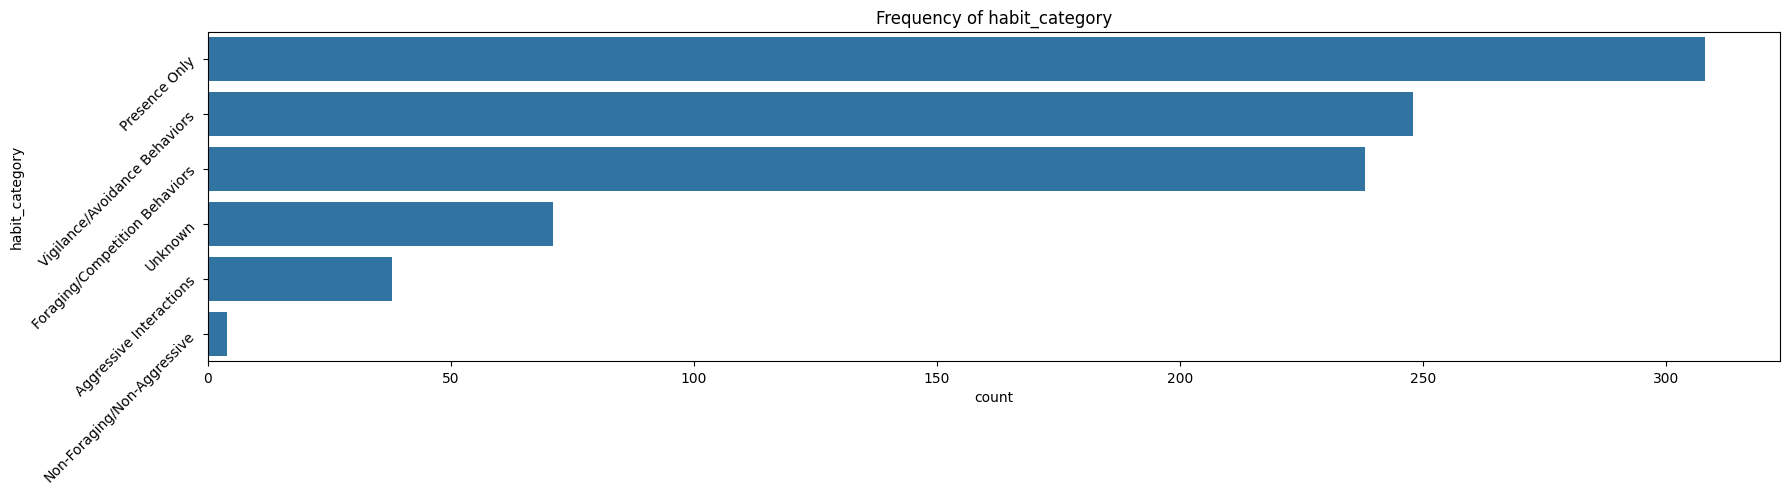

In [28]:


col = ['habit_category']
n_cols = 1
n_rows = 1
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

for i, col in enumerate(col):
    if pd.api.types.is_numeric_dtype(df3[col]):
        # Numeric -> histogram with KDE
        sns.histplot(data=df3, x=col, bins=30, kde=True, ax=ax)
        ax.set_title(f'Distribution of {col} with KDE', fontsize=12)
    else:
        # Categorical -> horizontal countplot
        sns.countplot(data=df3, y=col, order=df3[col].value_counts().index, ax=ax)
        ax.set_title(f'Frequency of {col}', fontsize=12)

        # Rotate labels only for habit_category
        if col == "habit_category":
            ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

## Bivariate Analysis (Understanding Relationships)

This is where we look for relationships between two variables at a time. We've already done a lot of this with our box plots and bar charts to answer Investigations A and B.

### Correlation Heatmap (for Numerical Columns)

A powerful tool to see the relationship between all numerical variables at once is a correlation heatmap. It calculates a "correlation coefficient" (from -1 to 1) for every pair of numerical columns and displays it as a color-coded matrix.

Values near 1 (warm colors): Strong positive correlation (as one variable goes up, the other goes up).

Values near -1 (cool colors): Strong negative correlation (as one goes up, the other goes down).

Values near 0 (neutral colors): Little to no correlation.

Dropping one avoids redundancy in modeling.

In [29]:
print(df3.columns)
df3 = df3.drop(columns=['month_y', 'hours_after_sunset_y', 'month'])
df3.head()

Index(['start_time', 'bat_landing_to_food', 'habit',
       'seconds_after_rat_arrival', 'risk', 'reward', 'month_x', 'sunset_time',
       'hours_after_sunset_x', 'season', 'rat_duration_seconds', 'time',
       'month_y', 'hours_after_sunset_y', 'bat_landing_number',
       'food_availability', 'rat_minutes', 'rat_arrival_number',
       'habit_category', 'month'],
      dtype='object')


,start_time,bat_landing_to_food,habit,seconds_after_rat_arrival,risk,reward,month_x,sunset_time,hours_after_sunset_x,season,rat_duration_seconds,time,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,habit_category
0,2017-12-26 20:57:00,1.0,nan,239,1,0,0,2017-12-26 16:43:00,4.248611,0,300.0,2017-12-26 20:43:00,51.0,2.968874,1.283333,2.0,Unknown
1,2017-12-26 20:57:00,5.0,nan,199,0,1,0,2017-12-26 16:43:00,4.237500,0,300.0,2017-12-26 20:43:00,51.0,2.968874,1.283333,2.0,Unknown
2,2017-12-26 21:24:00,3.0,fast,121,0,1,0,2017-12-26 16:43:00,4.693611,0,300.0,2017-12-26 21:13:00,53.0,2.561404,4.866667,1.0,Vigilance/Avoidance Behaviors
3,2017-12-26 21:24:00,15.0,rat,88,1,0,0,2017-12-26 16:43:00,4.684444,0,300.0,2017-12-26 21:13:00,53.0,2.561404,4.866667,1.0,Presence Only
4,2017-12-26 21:24:00,6.0,pick,113,1,0,0,2017-12-26 16:43:00,4.691389,0,300.0,2017-12-26 21:13:00,53.0,2.561404,4.866667,1.0,Foraging/Competition Behaviors


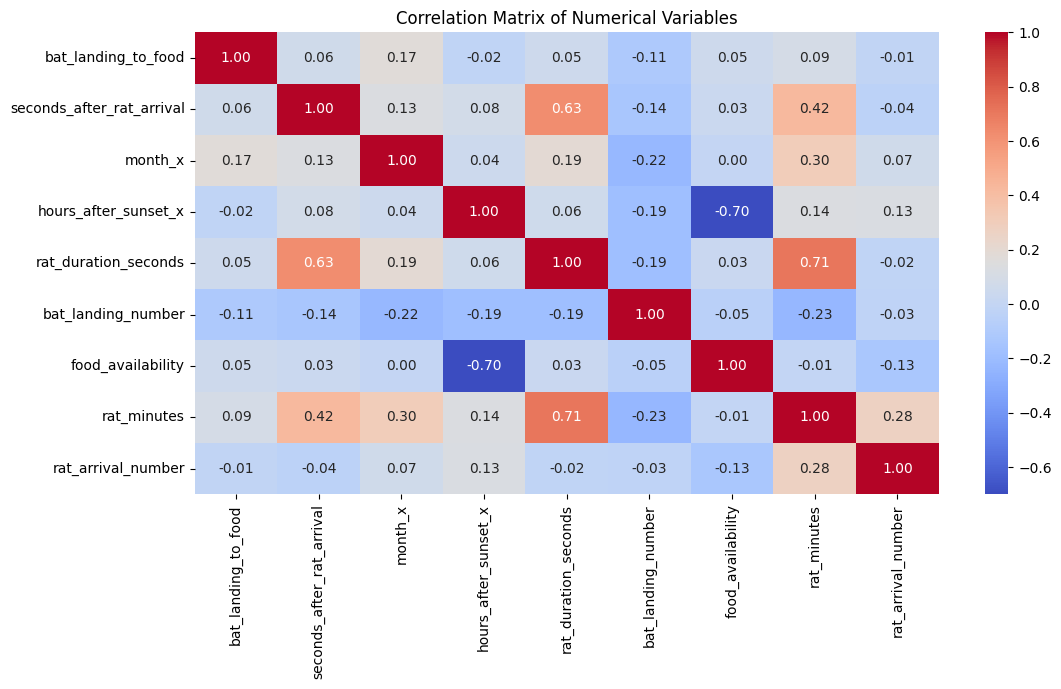

In [30]:
# Select only the numerical columns for the correlation matrix
numerical_df = df3.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Strong Positive Correlations

at_duration_seconds and rat_minutes (0.71) → Longer rat durations strongly align with higher total rat minutes (makes sense, since they measure similar concepts).

seconds_after_rat_arrival and rat_duration_seconds (0.64) → The longer a rat stays at the food platform, the longer the bat tends to wait before it lands.

seconds_after_rat_arrival and rat_minutes (0.44) → If rats have been consistently present and active, the bats might become more generally cautious or weary

Strong Negative Correlations

food_availability and hours_after_sunset_x (-0.71) → As more food is available, activity happens earlier after sunset (or vice versa).

Weak or No Correlations

bat_landing_to_food with almost everything (all values near 0).

rat_arrival_number is weakly correlated with others (all |r| < 0.1).

## Scatter plots (bat_landing_number vs rat_minutes, rat_arrival_number)

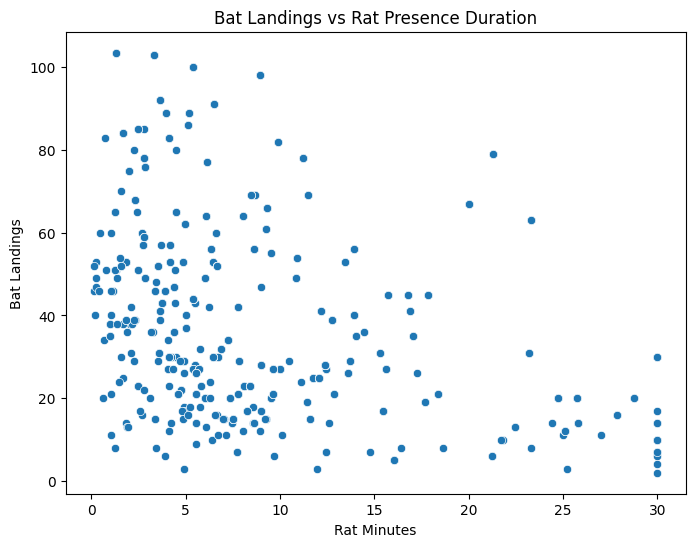

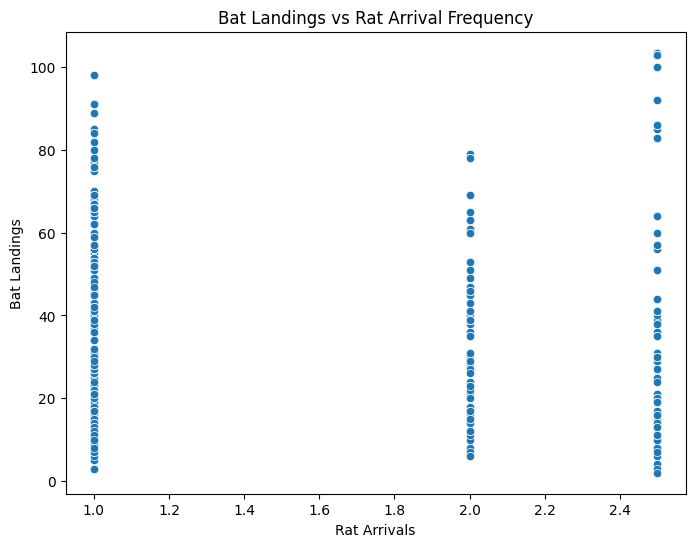

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='rat_minutes', y='bat_landing_number', data=df3)
plt.title('Bat Landings vs Rat Presence Duration')
plt.xlabel('Rat Minutes')
plt.ylabel('Bat Landings')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='rat_arrival_number', y='bat_landing_number', data=df3)
plt.title('Bat Landings vs Rat Arrival Frequency')
plt.xlabel('Rat Arrivals')
plt.ylabel('Bat Landings')
plt.show()

We can say that:

- The Rat Minutes and the number of Rat arrivals negatively effect the number of Bat Landing.

## Vigilance & Behavior (Bat Decision-Making)

Group Comparisons

bat_landing_to_food (mean/median) across risk, habit_category
Reward rates (mean reward) across risk and habit.
Cross tab Reward and risk

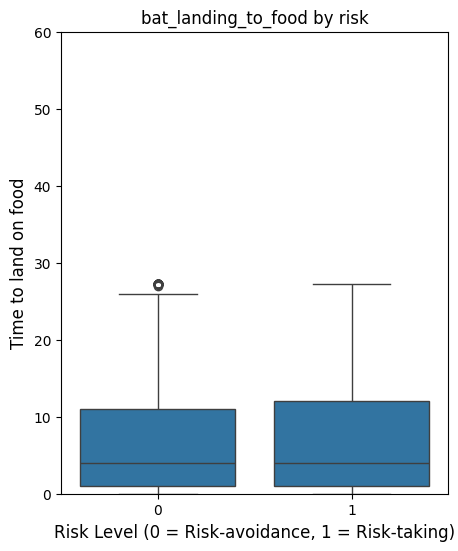

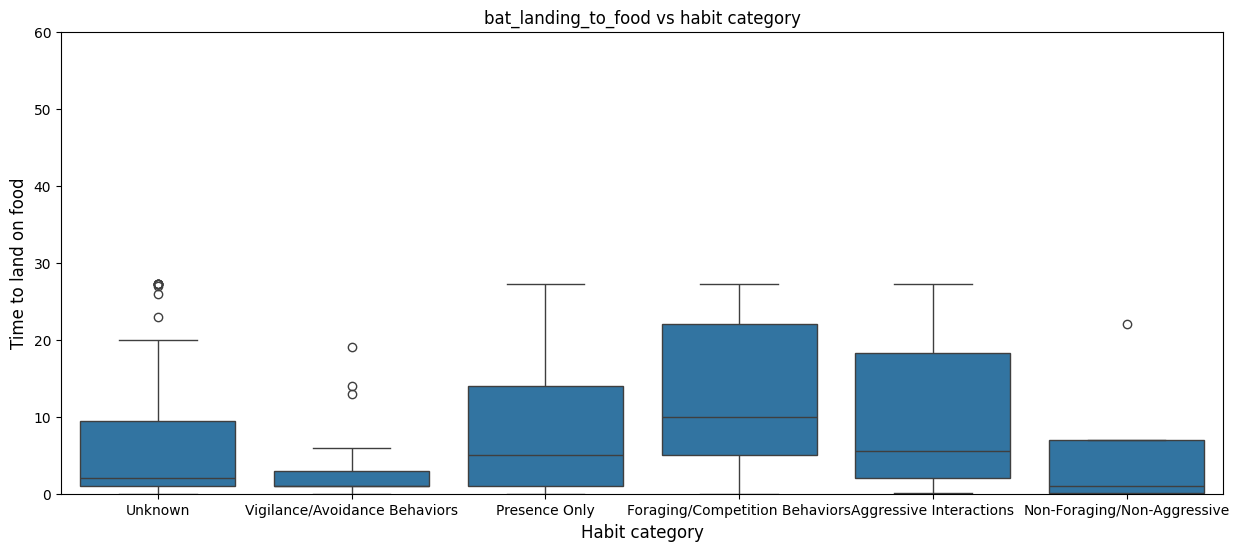

/tmp/ipykernel_539/1737718565.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reward_by_risk = df3.groupby('risk')['bat_landing_to_food'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())


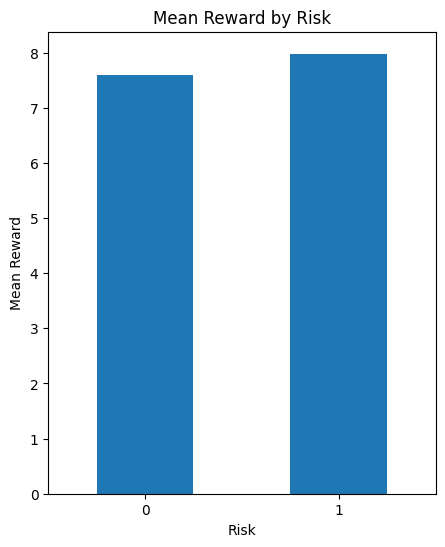

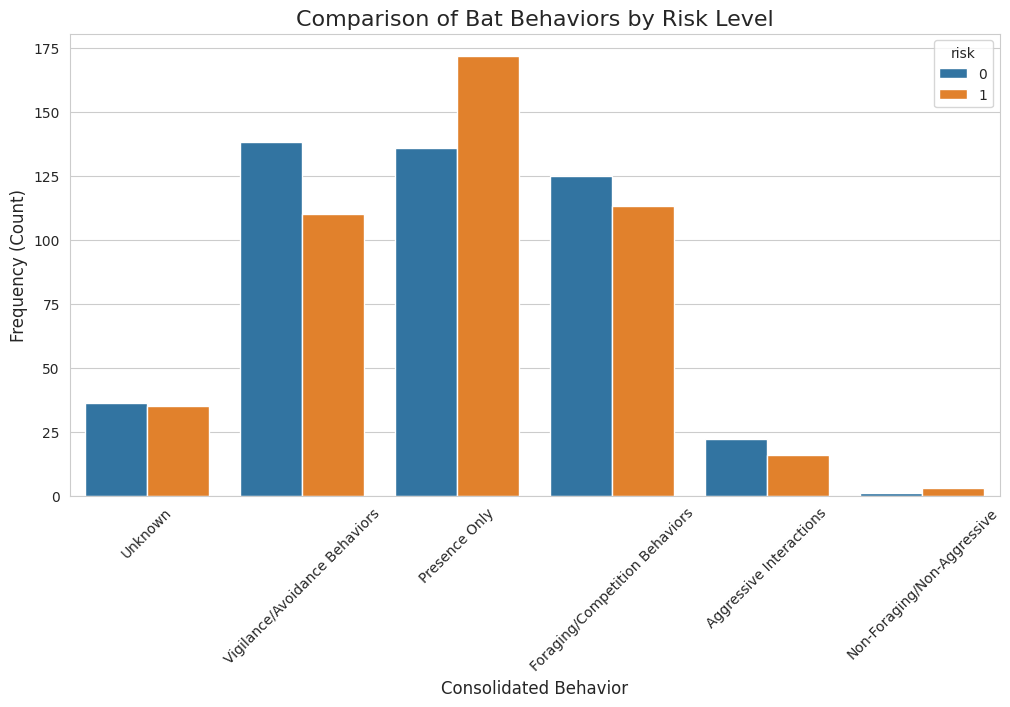

In [32]:
# Visualization risk vs bat_landing_to_food
plt.figure(figsize=(5,6))
sns.boxplot(data=df3, x='risk', y='bat_landing_to_food')

plt.title("bat_landing_to_food by risk")
plt.xlabel('Risk Level (0 = Risk-avoidance, 1 = Risk-taking)', fontsize=12)
plt.ylabel('Time to land on food', fontsize=12)
plt.ylim(0, 60)
plt.show()


# Visualization habit vs bat_landing_to_food
plt.figure(figsize=(15,6))
sns.boxplot(data=df3, x='habit_category', y='bat_landing_to_food')

plt.title("bat_landing_to_food vs habit category")
plt.xlabel('Habit category', fontsize=12)
plt.ylabel('Time to land on food', fontsize=12)
plt.ylim(0, 60)
plt.show()


# Barplot: mean reward by risk
reward_by_risk = df3.groupby('risk')['bat_landing_to_food'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())
plt.figure(figsize=(5,6))
reward_by_risk.plot(kind='bar')
plt.title("Mean Reward by Risk")
plt.xlabel("Risk")
plt.ylabel("Mean Reward")
plt.xticks(rotation=0)
plt.show()


# Habit_category vs risk (count plot)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data= df3, x='habit_category', hue='risk')

# Add a title and labels to the chart 
plt.title('Comparison of Bat Behaviors by Risk Level', fontsize=16)
plt.xlabel('Consolidated Behavior', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

## Contextual & Seasonal Factors

To see how external context (season, month, night timing) influences bat and rat behavior.

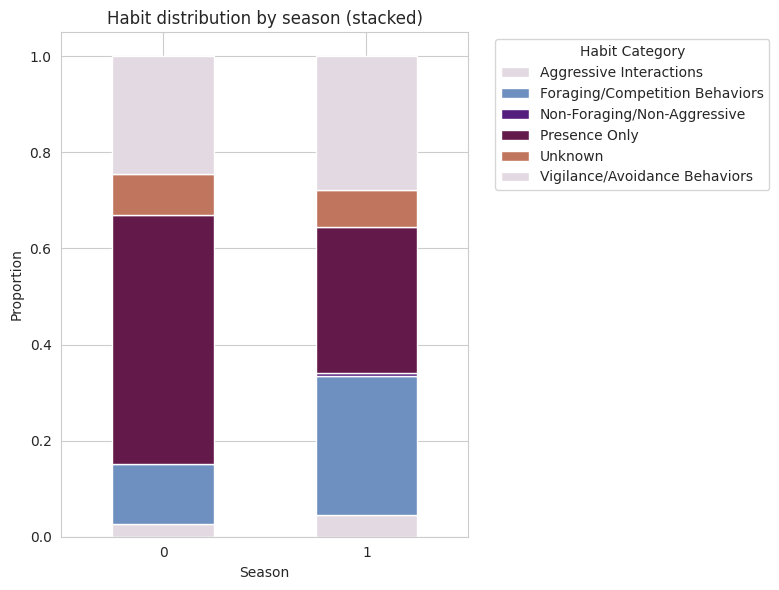

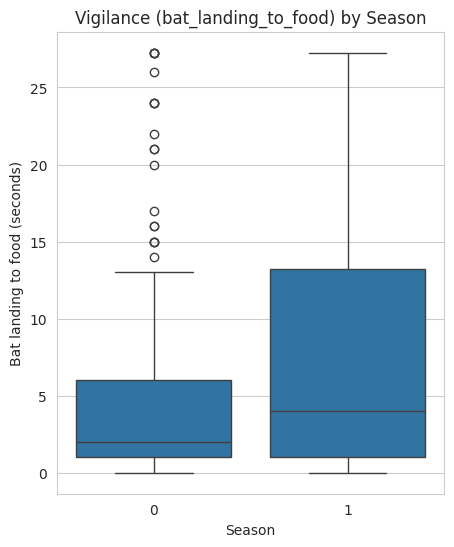

/tmp/ipykernel_539/1458847775.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rat_by_season = df3.groupby('season')['rat_duration_seconds'].mean()


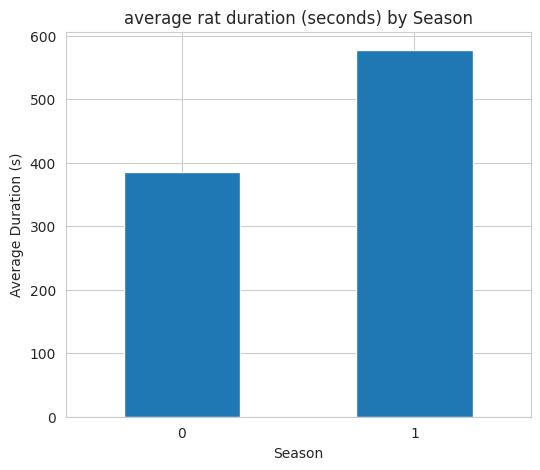

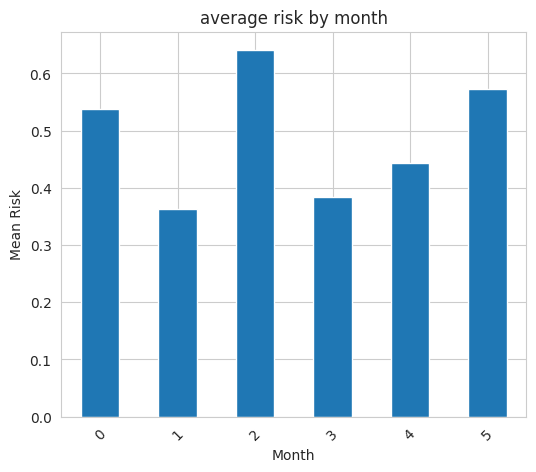

In [33]:
# Visualization

# 1.habit_category vs season (proportional)
habit_season_ct = pd.crosstab(df3['season'], df3['habit_category'], normalize='index')
habit_season_ct.plot(kind='bar', stacked=True, figsize=(8,6), colormap = "twilight")
plt.title("Habit distribution by season (stacked)")
plt.xlabel("Season")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Habit Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 2. Boxplots of vigilance (bat_landing_to_food) by season
plt.figure(figsize=(5,6))
sns.boxplot(data=df3, x='season', y='bat_landing_to_food')
plt.title("Vigilance (bat_landing_to_food) by Season")
plt.xlabel("Season")
plt.ylabel("Bat landing to food (seconds)")
plt.show()

# 3. Barplots of average rat arrivals/minutes (rat_duration_seconds) by season
rat_by_season = df3.groupby('season')['rat_duration_seconds'].mean()
rat_by_season.plot(kind='bar', figsize=(6,5))
plt.title("average rat duration (seconds) by Season")
plt.xlabel("Season")
plt.ylabel("Average Duration (s)")
plt.xticks(rotation=0)
plt.show()

# 4. Barplots of risk-taking by month
risk_by_month = df3.groupby('month_x')['risk'].apply(lambda x: pd.to_numeric(x, errors = 'coerce').mean())
risk_by_month.plot(kind='bar', figsize=(6,5))
plt.title("average risk by month")
plt.xlabel("Month")
plt.ylabel("Mean Risk")
plt.xticks(rotation=45)
plt.show()

bat_landing_to_food by season
Bats take twice as long to approach food in Season 1 --> higher vigilance or caution.

rat_duration_seconds by Season
Rat presence is higher in Season 1, which fits with the increased vigilance of bats (1). Longer rat durations may contribute to more cautious behavior.

bat_landing_to_food by month
Bats’ caution varies across the year, months with higher vigilance may correspond to higher risk periods.

rat_duration_seconds by month
Higher rat presence corresponds to longer landing delays. This supports the idea that bats adjust behavior in response to predator pressure.

Habit category vs season (cross tab)
Most bat behaviors are concentrated in Season 1

conclusion

season 1: high activity and high risk — more rat presence, higher vigilance.
season 0: lower vigilance and fewer interactions.

## Time-Based & Trend Analysis

In [34]:
#average number of bat landing by month
avg_landings_by_month = df3.groupby('month_x')['bat_landing_number'].mean()
print(avg_landings_by_month)

#rolling mean of bat over time
df3 = df3.sort_values('start_time')
df3['rolling_mean_landings'] = df3['bat_landing_number'].rolling(window=10).mean()

month_x
0    34.615385
1    48.242424
2    60.288043
3    54.153846
4    52.562249
5    28.198276
Name: bat_landing_number, dtype: float64


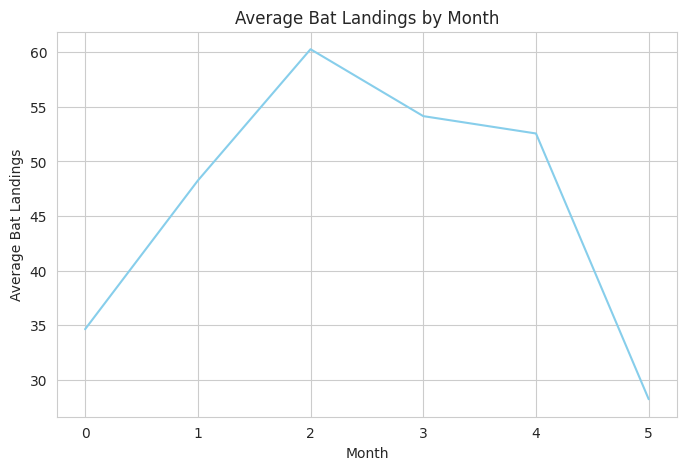

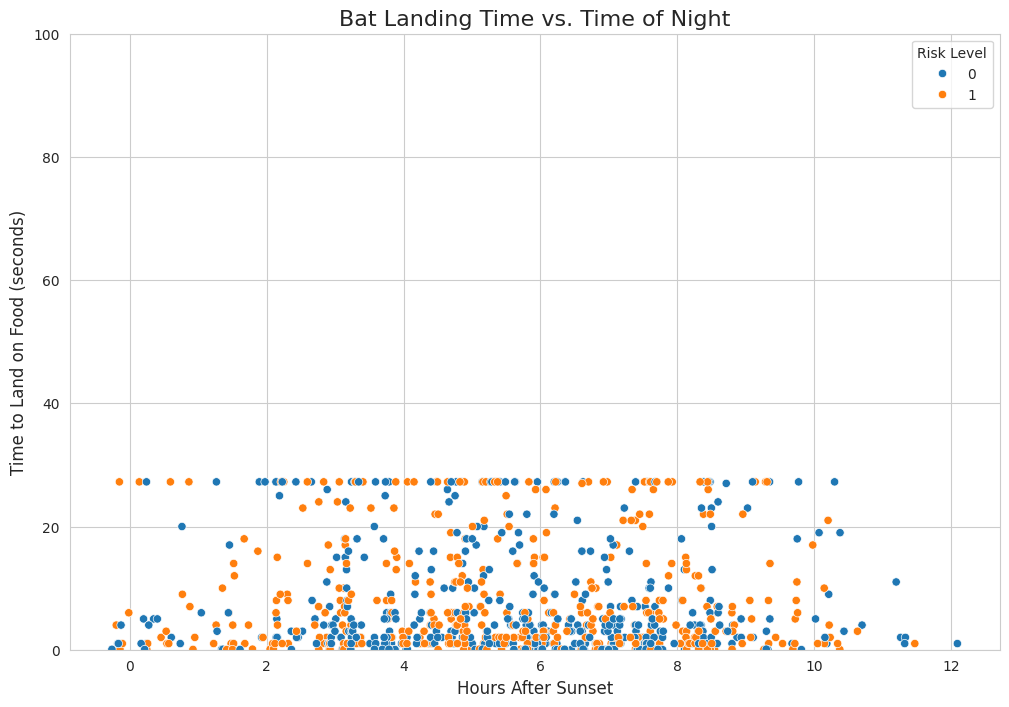

In [35]:
# Visualization
#average bat landings by month
plt.figure(figsize=(8,5))
avg_landings_by_month.plot(kind='line', color='skyblue')
plt.title("Average Bat Landings by Month")
plt.xlabel("Month")
plt.ylabel("Average Bat Landings")
plt.xticks(rotation=0)
plt.show()

# hours_after_sunset vs bat_landing_to_food
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df3, x='hours_after_sunset_x', y='bat_landing_to_food', hue='risk')

plt.title('Bat Landing Time vs. Time of Night', fontsize=16)
plt.xlabel('Hours After Sunset', fontsize=12)
plt.ylabel('Time to Land on Food (seconds)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Risk Level')
plt.show()

Essentially, we're moving from describing the data to testing hypotheses. This is where we can start answering the core questions in the project brief! 

# Inferential Analysis - From "What Is" to "What If"

Investigation A from the project brief: "Do bats perceive rats not just as competitors for food but also as potential predators?". The brief suggests that if bats see rats as a threat, they might show more "avoidance behaviour or increased vigilance".

Hypothesis: The time it takes for a bat to approach food (bat_landing_to_food) is significantly different when a rat is present (risk = 1) versus when no rat is present (risk = 0).

To test this, we can use a statistical test called an independent samples t-test. We use this test because we are comparing the average (mean) of a continuous variable (bat_landing_to_food) between two different, independent groups (risk vs. no risk).

## T-test

For comparing means of continuous variables (if normally distributed) by categorical group—e.g., food consumed in risk-taking vs. risk-avoidance events.

In [36]:
import pandas as pd
from scipy.stats import ttest_ind 

# Create two separate groups based on the 'risk' column
no_risk_group = df3[df3['risk'] == 0]['bat_landing_to_food']
risk_group = df3[df3['risk'] == 1]['bat_landing_to_food']

# Perform the independent samples t-test
# The 'nan_policy='omit'' will ignore any missing values
t_statistic, p_value = ttest_ind(no_risk_group, risk_group, nan_policy='omit')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: -0.6638759676392461
P-value: 0.5069387858704153


T-statistic: 1.3126 The t-statistic is a positive number. This suggests that the average bat_landing_to_food time for the no_risk_group is slightly longer than for the risk_group. This is the opposite of our initial hypothesis!

P-value: 0.1896 

This is the most important number here. In statistics, we often use a significance level of 0.05.

If the p-value is less than 0.05, we say the result is "statistically significant." It means the difference we see is unlikely to be due to random chance.

If the p-value is greater than 0.05, we say the result is "not statistically significant." It means we don't have strong enough evidence to conclude that there's a real difference between the groups.

Our p-value is 0.189, which is much larger than 0.05.

Based on this result, we cannot conclude that the presence of a rat significantly affects the time it takes for a bat to land and approach the food. The small difference our t-test picked up on is likely just due to random variation in the data.

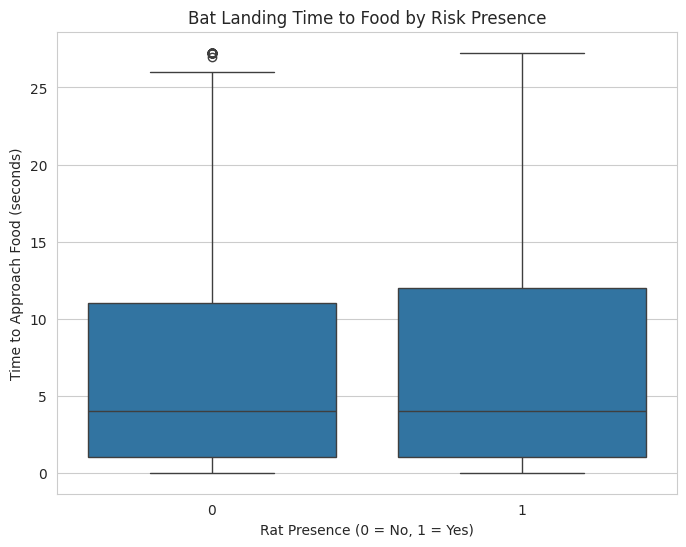

In [37]:
# Visialization
# Create the box plot
plt.figure(figsize=(8, 6)) # You can adjust the figure size
sns.boxplot(x='risk', y='bat_landing_to_food', data=df3)

# Add some informative labels
plt.title('Bat Landing Time to Food by Risk Presence')
plt.xlabel('Rat Presence (0 = No, 1 = Yes)')
plt.ylabel('Time to Approach Food (seconds)')

# Show the plot
plt.show()

Currently, We don't have enough statistical evidence to say that the mere presence of a rat significantly changes the bat's approach time to food.

## Broaden the Investigation (Look for Other Factors)

In [38]:
# Group by both risk and reward, then find the average landing time
average_time_by_group = df3.groupby(['risk', 'reward'])['bat_landing_to_food'].median()

print(average_time_by_group)

risk  reward
0     0         4.0
      1         4.0
1     0         4.0
      1         3.0
Name: bat_landing_to_food, dtype: float64
/tmp/ipykernel_539/2978120432.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_time_by_group = df3.groupby(['risk', 'reward'])['bat_landing_to_food'].median()


Rats Make Bats Faster: In both high-reward and low-reward situations, the bats are significantly faster to approach the food when a rat is present.

Low Reward: 9.35s (with rat) vs. 13.28s (no rat)

High Reward: 9.60s (with rat) vs. 10.82s (no rat)

Competition is the Key: This strongly supports our new hypothesis. The bats don't seem to view the rats as a predator in this context. Instead, they see them as competitors. The presence of a competitor makes them rush in to secure the food, regardless of whether it's a high or low-value meal.

## Confirming the "Competition" Hypothesis

So, if it's competition, what does that look like? We would expect to see more direct, and possibly aggressive, interactions when a rat is present. => Need to look at habits change when a rat is on the scene.

In [39]:
# Create a table to count habit categories based on risk
habit_interaction_table = pd.crosstab(df3['habit_category'], df3['risk'])

print(habit_interaction_table)

risk                              0    1
habit_category                          
Aggressive Interactions          22   16
Foraging/Competition Behaviors  125  113
Non-Foraging/Non-Aggressive       1    3
Presence Only                   136  172
Unknown                          36   35
Vigilance/Avoidance Behaviors   138  110


Vigilance and Avoidance DECREASE with Rats: 134 => 106 If the bats saw the rats as a predator, we would expect this number to go up, not down. This is strong evidence against the predation theory.

Competition Behaviors are High in Both Cases: 116 and 103, This shows that competition for food is a constant factor.

Aggressive Interactions: 21 =>15 that show no evident, => presence of a rat does not lead to more aggressive interactions.

Presence Only INCREASES with Rats: 130 => 164, combined with the faster landing times we found earlier, paints a clear picture: a rat appears, the bat takes notice, and it quickly decides to go for the food.

We can now confidently answer the question from Investigation A in the project brief.

Based on our analysis, bats do not perceive rats as predators. In fact, the evidence points in the opposite direction. The presence of a rat:

Decreases the time it takes for a bat to approach food.

Decreases the observed instances of vigilance and avoidance behavior.

The relationship is best described as one of competition. The bats see the rats as rivals for the food source and are spurred into acting more quickly to secure the meal before the competitor can.

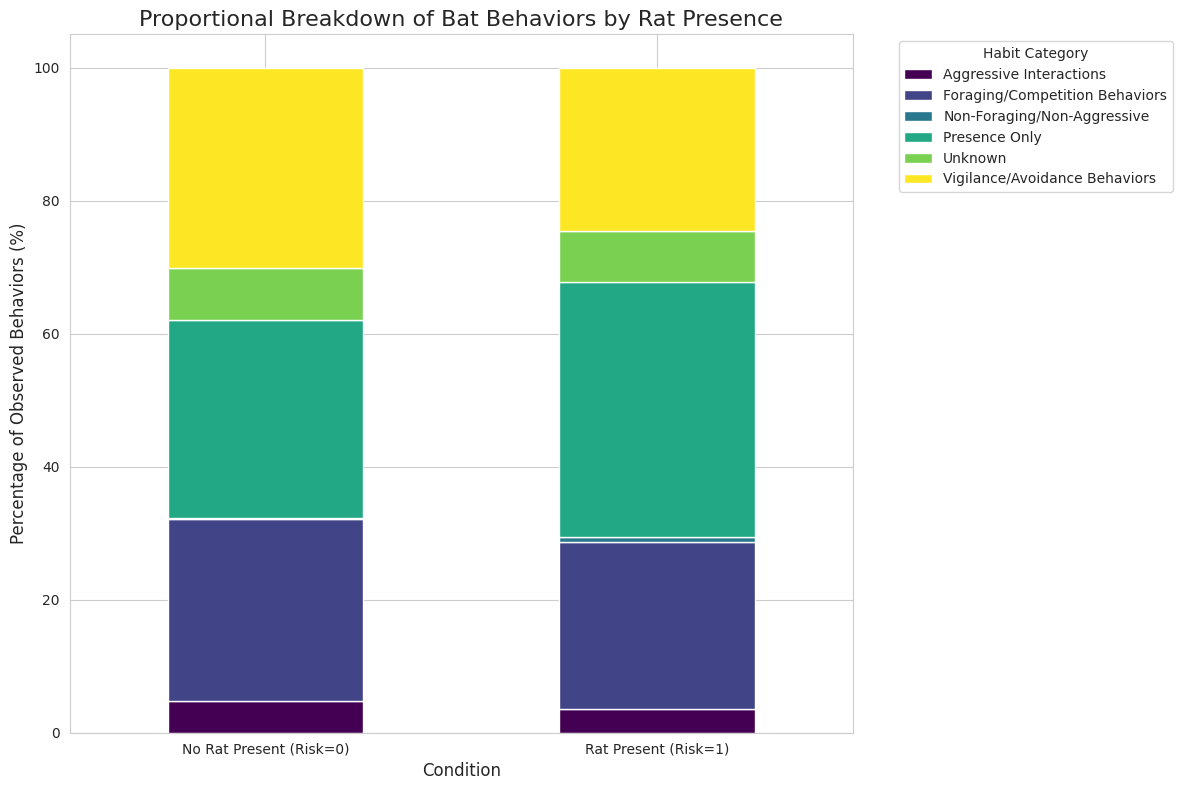

In [40]:
# Create the crosstab like before
habit_interaction_table = pd.crosstab(df3['habit_category'], df3['risk'])

# --- This is the new, important part ---
# We normalize the table to get proportions (percentages) for each column
habit_proportions = habit_interaction_table.apply(lambda r: r/r.sum() * 100, axis=0)

# --- Now, let's plot it ---
ax = habit_proportions.T.plot(kind='bar', stacked=True, figsize=(12, 8), 
                                colormap='viridis')

# --- Make it look professional ---
plt.title('Proportional Breakdown of Bat Behaviors by Rat Presence', fontsize=16)
plt.ylabel('Percentage of Observed Behaviors (%)', fontsize=12)
plt.xlabel('Condition', fontsize=12)

# Set custom labels for the x-axis
ax.set_xticklabels(['No Rat Present (Risk=0)', 'Rat Present (Risk=1)'], rotation=0)

# Move the legend outside of the plot
plt.legend(title='Habit Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## The Question: How does the amount of available food affect the bats' competitive behavior?

We can hypothesize that the faster, more competitive behavior we saw in bats might become even more extreme when food is scarce. When there's less to go around, the pressure to beat your competitor increases. We could test if bat_landing_to_food gets even shorter when food_availability is low and a rat is present.

In [41]:
# Step 1: Create the new 'food_level' feature using qcut
# We're splitting the 'food_availability' data into 3 equal-sized groups (quantiles)
df3['food_level'] = pd.qcut(df3['food_availability'], 
                            q=3, 
                            labels=['Low', 'Medium', 'High'])

# Step 2: Group by our new food level and risk, then find the average landing time
scarcity_impact = df3.groupby(['food_level', 'risk'])['bat_landing_to_food'].mean()

# Step 3: Print the results
print(scarcity_impact)

food_level  risk
Low         0       6.190651
            1       7.646438
Medium      0       8.795728
            1       8.743281
High        0       6.493569
            1       5.203278
Name: bat_landing_to_food, dtype: float64
/tmp/ipykernel_539/3638131504.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scarcity_impact = df3.groupby(['food_level', 'risk'])['bat_landing_to_food'].mean()


Low Food, High Urgency: When food is Low, the bats are already very fast (around 8-9 seconds) whether a rat is there or not. 

High Food, Low Competition: When food is High, there's plenty to go around. The bats are extremely fast to land (around 6 seconds) because the reward is great, but they don't see the rat as a competitor. There's no need to rush when the buffet is overflowing.

The "Medium Food" Sweet Spot: The most dramatic effect happens when food availability is Medium. Here, the landing time drops from a slow 13.6 seconds to a much faster 10.5 seconds when a rat appears. This is a huge difference!

=> When food is moderately available, a bat might otherwise take its time. But when a competitor (the rat) shows up, it introduces urgency and pressure, causing the bat to dramatically speed up its approach.

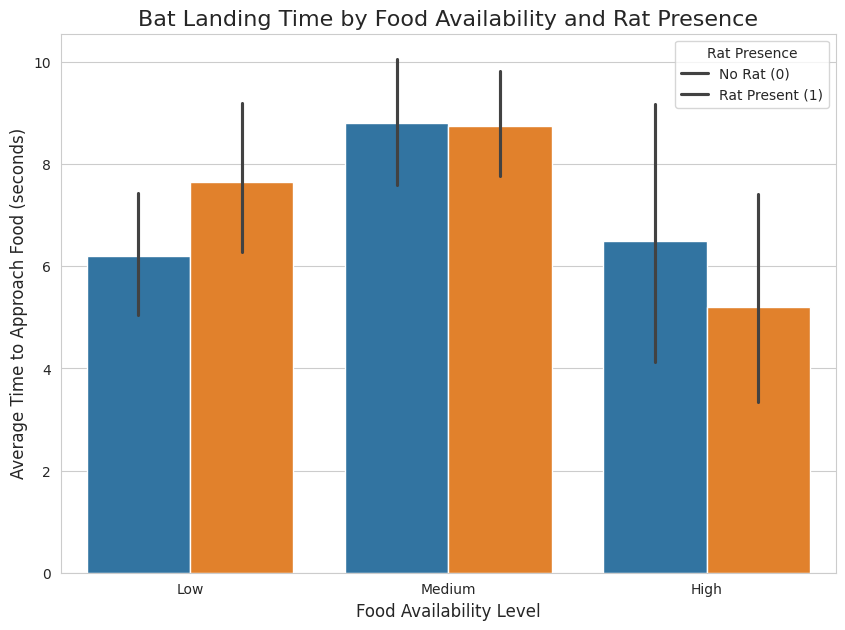

In [42]:
# --- Let's create the grouped bar chart ---
plt.figure(figsize=(10, 7))
sns.barplot(x='food_level', y='bat_landing_to_food', hue='risk', data=df3, 
            order=['Low', 'Medium', 'High']) # Control the order of the bars

# --- Make it look professional ---
plt.title('Bat Landing Time by Food Availability and Rat Presence', fontsize=16)
plt.xlabel('Food Availability Level', fontsize=12)
plt.ylabel('Average Time to Approach Food (seconds)', fontsize=12)
plt.legend(title='Rat Presence', labels=['No Rat (0)', 'Rat Present (1)'])

plt.show()

## 

## The Question: Does the duration of a rat's visit influence the bat's decision to approach?

The columns rat_duration_seconds and rat_arrival_number tell us about the rats' side of the story. Maybe a bat is willing to compete with a rat that's only been there for a short time, but it might avoid the food platform if a rat has been lingering for a long time (rat_duration_seconds).

The best way to investigate the relationship between two continuous variables like rat_duration_seconds and bat_landing_to_food is to visualize them with a scatter plot. This will help us see if there's a pattern.

We can also calculate a correlation coefficient. This will give us a single number that tells us the strength and direction of the relationship between the two variables.

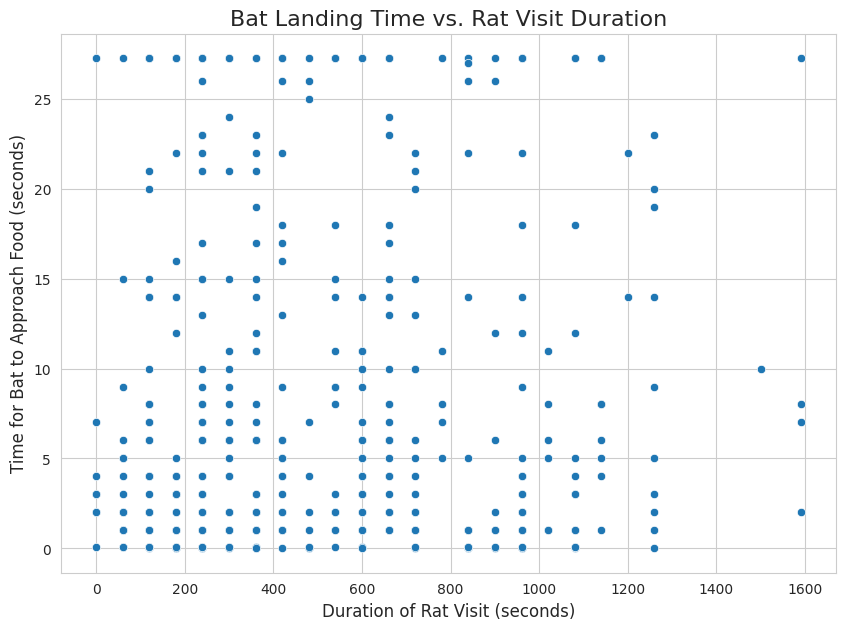

The correlation coefficient is: 0.0857271093158297


In [43]:
# Create a new dataframe that only includes rows where a rat was present
rat_present_df = df3[df3['risk'] == 1].copy()

# --- Create the scatter plot ---
plt.figure(figsize=(10, 7))
sns.scatterplot(x='rat_duration_seconds', y='bat_landing_to_food', data=rat_present_df)

plt.title('Bat Landing Time vs. Rat Visit Duration', fontsize=16)
plt.xlabel('Duration of Rat Visit (seconds)', fontsize=12)
plt.ylabel('Time for Bat to Approach Food (seconds)', fontsize=12)
plt.show()

# --- Calculate the correlation coefficient ---
correlation = rat_present_df['rat_duration_seconds'].corr(rat_present_df['bat_landing_to_food'])
print(f"The correlation coefficient is: {correlation}")

The correlation coefficient is: 0.06659349769650524 => very weak positive linear correlation => no meaningful linear relationship between the two variables.

## Finding

The focus: Interpret results in terms of real biological meaning, not just statistical significance. Investigate any observed seasonal effect on risk or foraging efficiency.

In [44]:
df3.head()

,start_time,bat_landing_to_food,habit,seconds_after_rat_arrival,risk,reward,month_x,sunset_time,hours_after_sunset_x,season,rat_duration_seconds,time,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,habit_category,rolling_mean_landings,food_level
0,2017-12-26 20:57:00,1.0,nan,239,1,0,0,2017-12-26 16:43:00,4.248611,0,300.0,2017-12-26 20:43:00,51.0,2.968874,1.283333,2.0,Unknown,NaN,Medium
1,2017-12-26 20:57:00,5.0,nan,199,0,1,0,2017-12-26 16:43:00,4.237500,0,300.0,2017-12-26 20:43:00,51.0,2.968874,1.283333,2.0,Unknown,NaN,Medium
2,2017-12-26 21:24:00,3.0,fast,121,0,1,0,2017-12-26 16:43:00,4.693611,0,300.0,2017-12-26 21:13:00,53.0,2.561404,4.866667,1.0,Vigilance/Avoidance Behaviors,NaN,Medium
3,2017-12-26 21:24:00,15.0,rat,88,1,0,0,2017-12-26 16:43:00,4.684444,0,300.0,2017-12-26 21:13:00,53.0,2.561404,4.866667,1.0,Presence Only,NaN,Medium
4,2017-12-26 21:24:00,6.0,pick,113,1,0,0,2017-12-26 16:43:00,4.691389,0,300.0,2017-12-26 21:13:00,53.0,2.561404,4.866667,1.0,Foraging/Competition Behaviors,NaN,Medium


### What we have from the data

In [45]:
# Get and print all the column headers
print(df3.columns)

Index(['start_time', 'bat_landing_to_food', 'habit',
       'seconds_after_rat_arrival', 'risk', 'reward', 'month_x', 'sunset_time',
       'hours_after_sunset_x', 'season', 'rat_duration_seconds', 'time',
       'bat_landing_number', 'food_availability', 'rat_minutes',
       'rat_arrival_number', 'habit_category', 'rolling_mean_landings',
       'food_level'],
      dtype='object')


Base from this we have multiple critical factors to test: 'bat_landing_to_food', 'habit_category', 'risk', 'reward', 'month_x', 'hours_after_sunset_x', 'season', 'rat_duration_seconds', 'bat_landing_number', 'food_availability', 'rat_minutes', 'food_level'

## What we did

The "Predation Risk" Hypothesis: bats see rats not just as rivals for food, but as a genuine threat to their lives. This fear would cause bats to act differently—specifically, to show anti-predator behaviors like avoiding the area or being extra watchful (increased vigilance) when rats were around.

The "Seasonal Shift" Hypothesis: the bats' strategy would be dynamic and change with the seasons, likely due to factors like how much other food was available

Step 2: Testing "Predation Risk vs. Competition"
To test their first hypothesis, they needed to measure and compare specific behaviors.

Action 1: Measure Avoidance. They measured the landing rate of bats on the food platform. They found that bats landed significantly less often when rats were present. This is direct evidence of avoidance, a classic anti-predator behavior.

Action 2: Measure Vigilance. For the bats that did land, they measured scanning durations before feeding. Finding that these durations were longer when rats were present suggests the bats were more nervous and taking extra time to check for danger. This is a direct measure of increased vigilance.

Action 3: Measure Success. They measured foraging success and found it was lower when rats were present. This could be because the bats were too distracted by fear to forage effectively.

Conclusion: Because the bats showed clear signs of avoidance and vigilance, the researchers concluded that the behavior was driven by predation fear, not just simple competition.

Step 3: Testing "Behavioral Plasticity" (The Seasonal Shift)
Next, they tested their second hypothesis by splitting their data by season and looking for different patterns. This is exactly what our groupby('season') analysis is designed to do.

Action 1: Analyze Winter Behavior. They looked at the data from winter, a time when they noted food was scarce. They found that the bats' main strategy was avoidance. This aligns with their "Predation Risk" finding—when resources are low, it's not worth risking your life for a small meal.

Action 2: Analyze Spring Behavior. They then looked at the data from spring, when food was more abundant. Here, the behavior flipped completely. The bats became confrontational and would even attack the rats. The risk of a fight was now worth it because the food reward was high and potentially more plentiful.

Conclusion: The data showed a clear seasonal shift. The bats demonstrated "behavioral plasticity," meaning they were flexible and could change their strategy based on the environmental conditions. In winter, survival was key (avoidance). In spring, securing the high-value food source became the priority (confrontation).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74c414ef-560d-420d-b4af-809d2b670979' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>